In [181]:
import pandas as pd
import FinanceDataReader as fdr
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cols = list(pd.read_csv('KOBIS_공식통계_연도별_202122.csv').iloc[3])
df_202122 = pd.read_csv('KOBIS_공식통계_연도별_202122.csv').iloc[4:]
df_202122.columns = cols
df_202122 = df_202122.set_index('순번')
df_202122 = df_202122[df_202122['개봉일'] >= '2020-01-01'].reset_index(drop = True)
df_202122

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국\n스크린수,전국\n매출액,전국\n관객수,서울\n매출액,서울\n관객수,장르,등급,영화구분
0,범죄도시2,이상용,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트",NaN,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",2022-05-18,개봉영화,장편,한국,"2,498","131,293,353,478","12,692,959","29,072,759,869","2,755,760",범죄,15세이상관람가,일반영화
1,탑건: 매버릭,조셉 코신스키,NaN,롯데컬처웍스(주)롯데엔터테인먼트,롯데컬처웍스(주)롯데엔터테인먼트,2022-06-22,개봉영화,장편,미국,"1,975","87,855,360,975","8,177,446","25,925,045,991","2,309,600",액션,12세이상관람가,일반영화
2,스파이더맨: 노 웨이 홈,존 왓츠,NaN,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2021-12-15,개봉영화,장편,미국,"2,948","75,193,912,210","7,551,990","21,054,819,760","2,041,418",액션,12세이상관람가,일반영화
3,아바타: 물의 길,제임스 카메론,NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2022-12-14,개봉영화,장편,미국,"2,809","90,295,968,802","7,313,220","22,182,474,983","1,713,871",액션,12세이상관람가,일반영화
4,한산: 용의 출현,김한민,(주)빅스톤픽쳐스,NaN,롯데컬처웍스(주)롯데엔터테인먼트,2022-07-27,개봉영화,장편,한국,"2,223","73,700,628,377","7,264,934","15,974,849,913","1,513,672",액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,O형수박가슴가정부-무삭제,판,스마일컨텐츠,NaN,스마일컨텐츠,2021-03-26,개봉영화,장편,한국,1,"1,000",1,"1,000",1,멜로/로맨스,청소년관람불가,일반영화
5522,S누나,이상영,블루커뮤니케이션,NaN,(주)코빈커뮤니케이션즈,2021-09-27,개봉영화,장편,한국,1,"1,000",1,0,0,성인물(에로),청소년관람불가,일반영화
5523,SNS 러브,NaN,NaN,NaN,스튜디오엘론(주),2021-01-28,개봉영화,장편,미국,1,"1,000",1,0,0,멜로/로맨스,청소년관람불가,일반영화
5524,SNS 헌팅으로 만난 음란 유학생,아라시야마 미치루,NaN,NaN,(주)빅콘미디어,2021-05-04,개봉영화,장편,일본,1,"6,000",1,0,0,성인물(에로),청소년관람불가,일반영화


##### 코로나 이전 / 이후 한국 영화 개봉수 비교

In [4]:
print('코로나 이후 한국영화 + 외국영화 개봉 수 :', df_202122.shape[0])
df_202122_korea = df_202122[df_202122['국적'] == '한국']
print('코로나 이후 한국영화 개봉 수 :' ,df_202122_korea.shape[0])

코로나 이후 한국영화 + 외국영화 개봉 수 : 5526
코로나 이후 한국영화 개봉 수 : 2371


In [5]:
cols = list(pd.read_csv('KOBIS_공식통계_연도별_171819.csv').iloc[3])
df_171819 = pd.read_csv('KOBIS_공식통계_연도별_171819.csv').iloc[4:]
df_171819.columns = cols
# df = df.reset_index(drop = True)
df_171819 = df_171819.set_index('순번')
df_171819 = df_171819[df_171819['개봉일'] >= '2017-01-01'].reset_index(drop = True)
df_171819

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국\n스크린수,전국\n매출액,전국\n관객수,서울\n매출액,서울\n관객수,장르,등급,영화구분
0,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
1,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,"1,912","115,698,654,137","14,410,754","27,530,825,087","3,346,172",판타지,12세이상관람가,일반영화
2,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화
3,겨울왕국 2,"크리스 벅,제니퍼 리",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-11-21,개봉영화,장편,미국,"2,648","111,596,248,720","13,369,064","27,828,487,460","3,113,576",애니메이션,전체관람가,일반영화
4,알라딘,가이 리치,NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-05-23,개봉영화,장편,미국,"1,311","106,955,138,359","12,552,283","30,198,375,039","3,374,837",어드벤처,전체관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,LA: 볼케이노칼립스,숀 케인,NaN,주식회사 루믹스미디어,주식회사 루믹스미디어,2019-07-11,개봉영화,장편,미국,1,"5,000",1,0,0,액션,12세이상관람가,일반영화
5566,P.S. 걸 무삭제,원석호,전망 PRODUCTION,NaN,전망 PRODUCTION,2017-02-06,개봉영화,장편,한국,1,"5,000",1,0,0,스릴러,청소년관람불가,일반영화
5567,S걸의 덫,그레고리 하타나카,NaN,(주)케이알씨지,(주)케이알씨지,2018-04-10,개봉영화,장편,브라질,1,"1,000",1,0,0,멜로/로맨스,청소년관람불가,일반영화
5568,T-34,알렉세이 시도로프,NaN,㈜코리아스크린,㈜코리아스크린,2019-06-27,개봉영화,장편,러시아,1,"5,000",1,0,0,전쟁,12세이상관람가,독립/예술영화


In [6]:
print('코로나 이전 한국영화 + 외국영화 개봉 수 :', df_171819.shape[0])
df_171819_korea = df_171819[df_171819['국적'] == '한국']
print('코로나 이전 한국영화 개봉 수 :' ,df_171819_korea.shape[0])

코로나 이전 한국영화 + 외국영화 개봉 수 : 5570
코로나 이전 한국영화 개봉 수 : 1852


##### 코로나가 풀리기 시작한 2022년에 많은 영화를 개봉했을 수 있으므로 연도별 한국국영화 개봉수 확인

##### 17 ~ 22 년도 한국영화 개봉수 확인

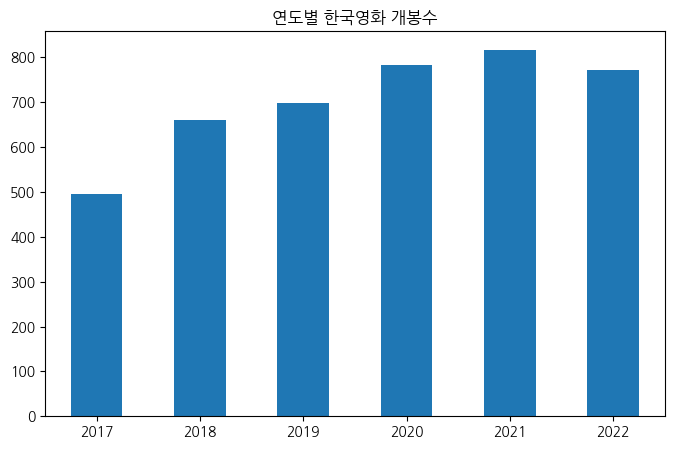

In [253]:
# 17년도 ~ 22년도 데이터 병합
df_17_to_22 = pd.concat([df_171819,df_202122], ignore_index=True)
# 년/월 추출을 위한 dt 사용을 위해 데이터타입 변경
df_17_to_22['개봉일'] = pd.to_datetime(df_17_to_22['개봉일'])
# 년/월 추출
df_17_to_22['개봉년도'] = df_17_to_22['개봉일'].dt.year
df_17_to_22['개봉월'] = df_17_to_22['개봉일'].dt.month
df_17_to_22['개봉연월'] = df_17_to_22['개봉일'].astype(str).str[:7]
# 한국영화 개봉수 시각화
year_series17_to_22 = df_17_to_22[df_17_to_22['국적'] == '한국']['개봉년도']
year_series17_to_22 = year_series17_to_22.value_counts().sort_index()
year_series17_to_22.plot.bar(rot = 0, figsize = (8,5), title = '연도별 한국영화 개봉수');

In [252]:
df_17_to_22_korea = df_17_to_22[df_17_to_22['국적'] == '한국'].reset_index(drop = True)

In [250]:
df_17_to_22.shape

(11096, 20)

코로나가 어느정도 풀리기 시작한 2022년도에 한국영화가 많이 개봉했을 것이라는 예상과 달리,
코로나 발생 이후 한국영화의 개봉이 꾸준히 상승세를 보였으며 2022년에 비해 2020년, 2021년에 더 많은 한국영화가
개봉했음을 알 수 있다

##### 17 - 19년 / 20 - 22년 관객수가 10,000명 이하인 영화의 수 구하기

In [8]:
# 17-19
df_171819_korea['전국\n관객수'] = df_171819_korea['전국\n관객수'].apply(lambda x: x.replace(',', ''))
df_171819_korea = df_171819_korea.astype({'전국\n관객수' : 'int64'})
# 20-22
df_202122_korea['전국\n관객수'] = df_202122_korea['전국\n관객수'].apply(lambda x: x.replace(',', ''))
df_202122_korea = df_202122_korea.astype({'전국\n관객수' : 'int64'})

C:\Users\juku\AppData\Local\Temp\ipykernel_14124\1226783394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_171819_korea['전국\n관객수'] = df_171819_korea['전국\n관객수'].apply(lambda x: x.replace(',', ''))
C:\Users\juku\AppData\Local\Temp\ipykernel_14124\1226783394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_202122_korea['전국\n관객수'] = df_202122_korea['전국\n관객수'].apply(lambda x: x.replace(',', ''))


In [9]:
# 관객수를 확인하기 위해 ' , ' 를 없애주고 data type을 int64 로 바꾸어줌
# 17-19
df_171819_korea.sort_values('전국\n관객수', ascending = True)
df_171819_korea.dtypes
# 20-22
df_202122_korea.sort_values('전국\n관객수', ascending = True)
df_202122_korea.dtypes

영화명         object
감독          object
제작사         object
수입사         object
배급사         object
개봉일         object
영화유형        object
영화형태        object
국적          object
전국\n스크린수    object
전국\n매출액     object
전국\n관객수      int64
서울\n매출액     object
서울\n관객수     object
장르          object
등급          object
영화구분        object
dtype: object

In [255]:
# 관객수가 10,000명 이하인 영화의 수
# 17-19
print('코로나 이전 : ',df_171819_korea[df_171819_korea['전국\n관객수'] <= 10000].shape[0], '명')
# 20-22
print('코로나 이후 : ',df_202122_korea[df_202122_korea['전국\n관객수'] <= 10000].shape[0], '명')

코로나 이전 :  1577 명
코로나 이후 :  2158 명


관객수가 10,000명 이하인 영화만을 발췌하여 비교했을 때 코로나 이후에 개봉한 한국 영화의 수가 이전에 개봉한 한국영화의 수의 비해 581편 더 많은 것을 알 수 있다. 코로나 이후에 개봉한 한국 영화의 수가 이전에 비해 519편 증가했음을 고려할 때 코로나 이후에 개봉한 영화 증가분의 대부분이 중-소형 영화임을 알 수 있다.

##### 상영횟수 구하고 위의 자료와 concat하기
* 박스오피스 자료에 상영횟수가 포함되어 있으므로 박스오피스 자료를 가지고 와 concat

##### 17~22년 각 년도 자료 가져오기

In [90]:
# 2022 박스오피스 자료
boxoffice_2022_cols = pd.read_csv('boxoffice_2022.csv').iloc[3]
boxoffice_2022 =  pd.read_csv('boxoffice_2022.csv')
boxoffice_2022 = boxoffice_2022.iloc[4:-1]
boxoffice_2022.columns = boxoffice_2022_cols
boxoffice_2022 = boxoffice_2022.set_index('순위')
boxoffice_2022 = boxoffice_2022[boxoffice_2022['국적'] == '한국']
boxoffice_2022 = boxoffice_2022[['영화명','개봉일','상영횟수']]
boxoffice_2022 = boxoffice_2022[(boxoffice_2022['개봉일'] >= '2017-01-01') & (boxoffice_2022['개봉일'] < '2023-01-01')]
boxoffice_2022 = boxoffice_2022.astype({ '상영횟수' : 'int64' })
boxoffice_2022 = boxoffice_2022.reset_index(drop = True)
# 2021박스오피스 자료
boxoffice_2021_cols = pd.read_csv('boxoffice_2021.csv').iloc[3]
boxoffice_2021 =  pd.read_csv('boxoffice_2021.csv')
boxoffice_2021 = boxoffice_2021.iloc[4:-1]
boxoffice_2021.columns = boxoffice_2021_cols
boxoffice_2021 = boxoffice_2021.set_index('순위')
boxoffice_2021 = boxoffice_2021[boxoffice_2021['국적'] == '한국']
boxoffice_2021 = boxoffice_2021[['영화명','개봉일','상영횟수']]
boxoffice_2021 = boxoffice_2021[(boxoffice_2021['개봉일'] >= '2017-01-01') & (boxoffice_2021['개봉일'] < '2022-01-01')]
boxoffice_2021 = boxoffice_2021.astype({ '상영횟수' : 'int64' })
boxoffice_2021 = boxoffice_2021.reset_index(drop = True)
# 2020 박스오피스 자료
boxoffice_2020_cols = pd.read_csv('boxoffice_2020.csv').iloc[3]
boxoffice_2020 =  pd.read_csv('boxoffice_2020.csv')
boxoffice_2020 = boxoffice_2020.iloc[4:-1]
boxoffice_2020.columns = boxoffice_2020_cols
boxoffice_2020 = boxoffice_2020.set_index('순위')
boxoffice_2020 = boxoffice_2020[boxoffice_2020['국적'] == '한국']
boxoffice_2020 = boxoffice_2020[['영화명','개봉일','상영횟수']]
boxoffice_2020 = boxoffice_2020[(boxoffice_2020['개봉일'] >= '2017-01-01') & (boxoffice_2020['개봉일'] < '2021-01-01')]
boxoffice_2020 = boxoffice_2020.astype({ '상영횟수' : 'int64' })
boxoffice_2020 = boxoffice_2020.reset_index(drop = True)
# 2019 박스오피스 자료
boxoffice_2019_cols = pd.read_csv('boxoffice_2019.csv').iloc[3]
boxoffice_2019 =  pd.read_csv('boxoffice_2019.csv')
boxoffice_2019 = boxoffice_2019.iloc[4:-1]
boxoffice_2019.columns = boxoffice_2019_cols
boxoffice_2019 = boxoffice_2019.set_index('순위')
boxoffice_2019 = boxoffice_2019[boxoffice_2019['국적'] == '한국']
boxoffice_2019 = boxoffice_2019[['영화명','개봉일','상영횟수']]
boxoffice_2019 = boxoffice_2019[(boxoffice_2019['개봉일'] >= '2017-01-01') & (boxoffice_2019['개봉일'] < '2020-01-01')]
boxoffice_2019 = boxoffice_2019.astype({ '상영횟수' : 'int64' })
boxoffice_2019 = boxoffice_2019.reset_index(drop = True)
# 2018 박스오피스 자료
boxoffice_2018_cols = pd.read_csv('boxoffice_2018.csv').iloc[3]
boxoffice_2018 =  pd.read_csv('boxoffice_2018.csv')
boxoffice_2018 = boxoffice_2018.iloc[4:-1]
boxoffice_2018.columns = boxoffice_2018_cols
boxoffice_2018 = boxoffice_2018.set_index('순위')
boxoffice_2018 = boxoffice_2018[boxoffice_2018['국적'] == '한국']
boxoffice_2018 = boxoffice_2018[['영화명','개봉일','상영횟수']]
boxoffice_2018 = boxoffice_2018[(boxoffice_2018['개봉일'] >= '2017-01-01') & (boxoffice_2018['개봉일'] < '2019-01-01')]
boxoffice_2018 = boxoffice_2018.astype({ '상영횟수' : 'int64' })
boxoffice_2018 = boxoffice_2018.reset_index(drop = True)
# 2017 박스오피스 자료
boxoffice_2017_cols = pd.read_csv('boxoffice_2017.csv').iloc[3]
boxoffice_2017 =  pd.read_csv('boxoffice_2017.csv')
boxoffice_2017 = boxoffice_2017.iloc[4:-1]
boxoffice_2017.columns = boxoffice_2017_cols
boxoffice_2017 = boxoffice_2017.set_index('순위')
boxoffice_2017 = boxoffice_2017[boxoffice_2017['국적'] == '한국']
boxoffice_2017 = boxoffice_2017[['영화명','개봉일','상영횟수']]
boxoffice_2017 = boxoffice_2017[(boxoffice_2017['개봉일'] >= '2017-01-01') & (boxoffice_2017['개봉일'] < '2018-01-01')]
boxoffice_2017 = boxoffice_2017.astype({ '상영횟수' : 'int64' })
boxoffice_2017 = boxoffice_2017.reset_index(drop = True)

##### 박스오피스 자료  concat 후 중복값 찾아 처리해주기
* 같은 영화가 여러해에 거쳐 상영했을 경우 (ex. 아바타는 2022년 말에 개봉하여 2023년까지 상영 중) 총 상영횟수를 더해주어야 의미가 있으므로 영화명과 개봉일이 같은 경우 상영횟수를 더해주었음

In [114]:
boxoffice_list = [boxoffice_2017, boxoffice_2018, boxoffice_2019, boxoffice_2020, boxoffice_2021, boxoffice_2022]
boxoffice_1722 = pd.concat(boxoffice_list)
boxoffice_1722 = boxoffice_1722.reset_index(drop = True)
# 영화명이 중복되는 자료들 모두 True 출력되도록 하기
dup = boxoffice_1722.duplicated(['영화명'], keep = False)
df_dup = pd.concat([boxoffice_1722, dup], axis = 1)
df_dup.rename(columns = {0:'Dup'}, inplace = True)
# 영화명과 개봉일이 같은 경우 상영횟수 더해주기
df_dup = df_dup.groupby(['영화명','개봉일'], as_index=False).sum()
df_dup

,영화명,개봉일,상영횟수,Dup
0,#살아있다,2020-06-24,137073,0
1,#해시태그,2022-06-01,49,0
2,0.0MHz,2019-05-29,5998,0
3,11번가청순글래머오피스걸,2021-07-23,1,0
4,11번가청순글래머오피스걸-무삭제,2021-09-29,1,0
...,...,...,...,...
4208,힐링캠프 : 한 세상,2017-06-22,20,0
4209,힐링캠프-한세상 무삭제,2017-07-27,1,0
4210,힐링하우스 : 섹스의 왕국,2022-05-10,1,0
4211,힘 좋은 시아버지와 착한 며느리,2021-03-18,1,0


##### 위에서 구한 데이터를 영화명을 기준으로 기존 데이터에 병합하기 (feat. merge)
* df_17_to_22_korea 에서 필요한 데이터만 남긴 후 df_dup를 영화명을 기준으로 left merge 하기

In [143]:
df_17_to_22_korea = df_17_to_22[df_17_to_22['국적'] == '한국'].reset_index(drop = True)
df_1722_korea = df_17_to_22_korea[['영화명','개봉일','국적','전국\n관객수','장르','등급','개봉연월']]
merge_left = pd.merge(df_1722_korea,df_dup, how='left', left_on='영화명', right_on='영화명')
# 결측값 확인 df.isnull().sum()
merge_left.isnull().sum()

영화명         0
개봉일_x       0
국적          0
전국\n관객수     0
장르         44
등급          0
개봉연월        0
개봉일_y      11
상영횟수       11
Dup        11
dtype: int64

##### 상영횟수를 기준으로 상영횟수가 없는 행 제거하기(feat. 결측치 제거하기)

In [144]:
merge_left = merge_left.dropna(subset=['상영횟수'])
# 장르가 Null 값인 데이터가 모두 성인물임을 확인함
merge_left[merge_left['장르'].isnull() == True]
merge_left.fillna('성인물(에로)')

,영화명,개봉일_x,국적,전국\n관객수,장르,등급,개봉연월,개봉일_y,상영횟수,Dup
0,극한직업,2019-01-23,한국,"16,264,944",코미디,15세이상관람가,2019-01,2019-01-23,292816.0,2.0
1,신과함께-죄와 벌,2017-12-20,한국,"14,410,754",판타지,12세이상관람가,2017-12,2017-12-20,214631.0,5.0
2,신과함께-인과 연,2018-08-01,한국,"12,253,247",판타지,12세이상관람가,2018-08,2018-08-01,180750.0,4.0
3,택시운전사,2017-08-02,한국,"12,099,971",드라마,15세이상관람가,2017-08,2017-08-02,184208.0,6.0
4,기생충,2019-05-30,한국,"10,085,275",드라마,15세이상관람가,2019-05,2019-05-30,206449.0,4.0
...,...,...,...,...,...,...,...,...,...,...
4226,MZ세대 쓰리섬,2022-11-23,한국,1,성인물(에로),청소년관람불가,2022-11,2022-11-23,1.0,0.0
4227,O형수박가슴가정부,2021-01-08,한국,1,멜로/로맨스,청소년관람불가,2021-01,2021-01-08,1.0,0.0
4228,O형수박가슴가정부-무삭제,2021-03-26,한국,1,멜로/로맨스,청소년관람불가,2021-03,2021-03-26,1.0,0.0
4229,S누나,2021-09-27,한국,1,성인물(에로),청소년관람불가,2021-09,2021-09-27,1.0,0.0


##### '성인영화 구분' column을 만들어 성인영화와 성인영화가 아닌 영화들을 구분하기.

In [148]:
merge_left['성인영화'] = merge_left['등급'] == "청소년관람불가"
merge_left.loc[merge_left['성인영화'], '성인영화 구분'] =  '성인영화'
merge_left.loc[~merge_left['성인영화'], '성인영화 구분'] =  '그 외'
merge_left

,영화명,개봉일_x,국적,전국\n관객수,장르,등급,개봉연월,개봉일_y,상영횟수,Dup,성인영화,성인영화 구분
0,극한직업,2019-01-23,한국,"16,264,944",코미디,15세이상관람가,2019-01,2019-01-23,292816.0,2.0,False,그 외
1,신과함께-죄와 벌,2017-12-20,한국,"14,410,754",판타지,12세이상관람가,2017-12,2017-12-20,214631.0,5.0,False,그 외
2,신과함께-인과 연,2018-08-01,한국,"12,253,247",판타지,12세이상관람가,2018-08,2018-08-01,180750.0,4.0,False,그 외
3,택시운전사,2017-08-02,한국,"12,099,971",드라마,15세이상관람가,2017-08,2017-08-02,184208.0,6.0,False,그 외
4,기생충,2019-05-30,한국,"10,085,275",드라마,15세이상관람가,2019-05,2019-05-30,206449.0,4.0,False,그 외
...,...,...,...,...,...,...,...,...,...,...,...,...
4226,MZ세대 쓰리섬,2022-11-23,한국,1,성인물(에로),청소년관람불가,2022-11,2022-11-23,1.0,0.0,True,성인영화
4227,O형수박가슴가정부,2021-01-08,한국,1,멜로/로맨스,청소년관람불가,2021-01,2021-01-08,1.0,0.0,True,성인영화
4228,O형수박가슴가정부-무삭제,2021-03-26,한국,1,멜로/로맨스,청소년관람불가,2021-03,2021-03-26,1.0,0.0,True,성인영화
4229,S누나,2021-09-27,한국,1,성인물(에로),청소년관람불가,2021-09,2021-09-27,1.0,0.0,True,성인영화


##### 코로나 이전(17-19년도)과 이후(20-22년도)를 기준으로 데이터를 나눈 후 
* 전체 영화 중 성인영화와 성인영화가 아닌 영화의 비율을 구하고,
* 상영횟수가 40회 미만인 영화(형식개봉영화) 중 성인영화와 성인영화가 아닌 영화의 비율을 구해보자.

##### 전체 영화 중 성인영화와 성인영화가 아닌 영화의 비율

In [232]:
# 코로나 이전 이후 구분
merge_left17_19 = merge_left[merge_left['개봉연월'] < '2020-01'].reset_index(drop = True)
merge_left20_22 = merge_left[merge_left['개봉연월'] >= '2020-01'].reset_index(drop = True)
# 전체 영화 중 성인영화와 성인영화가 아닌 영화의 비율
merge_left17_19_series = merge_left17_19['성인영화 구분'].value_counts()
merge_left20_22_series = merge_left20_22['성인영화 구분'].value_counts()
to_carry = pd.DataFrame()
to_carry2 = pd.concat([to_carry, merge_left17_19_series], axis = 1)
to_carry3 = pd.concat([to_carry2, merge_left20_22_series], axis = 1)
covid_before_after = to_carry3.T
covid_before_after.index = ['코로나 이전', '코로나 이후']
covid_before_after['total'] = covid_before_after['성인영화'] + covid_before_after['그 외']
covid_before_after['성인영화_percent'] = round(covid_before_after['성인영화'] / covid_before_after['total'] * 100, 2)
covid_before_after['그 외_percent'] = round(100 - covid_before_after['성인영화_percent'], 2)
covid_before_after

,성인영화,그 외,total,성인영화_percent,그 외_percent
코로나 이전,1348,501,1849,72.90,27.10
코로나 이후,1770,601,2371,74.65,25.35


##### 데이터 시각화

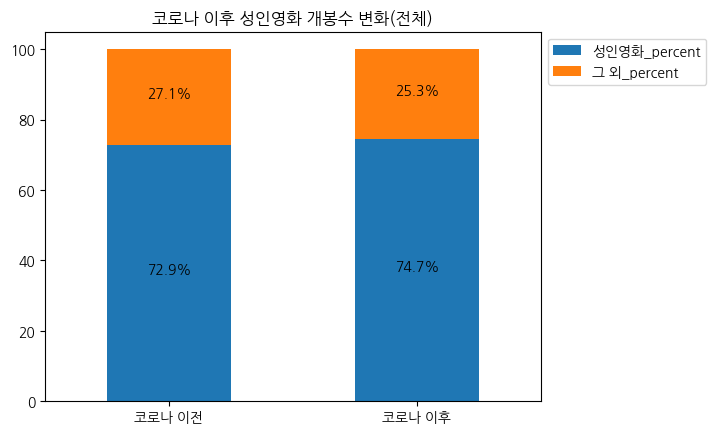

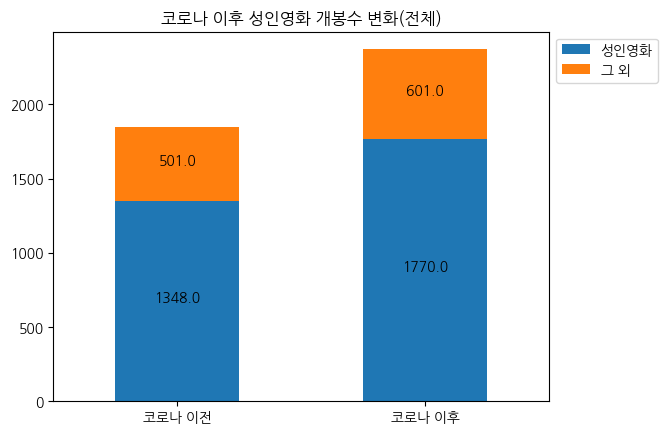

In [256]:
ax = covid_before_after[['성인영화_percent', '그 외_percent']].plot(kind = 'bar', rot = 0, stacked = True, title = '코로나 이후 성인영화 개봉수 변화(전체)')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height) + '%', xy=(left+width/2, bottom+height/2), ha='center')
    plt.legend(bbox_to_anchor=(1, 1))
ax = covid_before_after[['성인영화', '그 외']].plot(kind = 'bar', rot = 0, stacked = True, title = '코로나 이후 성인영화 개봉수 변화(전체)')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate((height), xy=(left+width/2, bottom+height/2), ha='center')
    plt.legend(bbox_to_anchor=(1, 1))

코로나 이후 전체 비율 중 성인영화의 비율이 1.8% 증가했으며
총 422편 더 개봉했다.

##### 상영횟수가 40회 미만인 영화(형식개봉영화) 중 성인영화와 성인영화가 아닌 영화의 비율

In [235]:
less40_17_19_series = merge_left17_19[merge_left17_19['상영횟수'] < 40]['성인영화 구분'].value_counts()
less40_20_22_series = merge_left20_22[merge_left20_22['상영횟수'] < 40]['성인영화 구분'].value_counts()
to_carry4 = pd.DataFrame()
to_carry5 = pd.concat([to_carry4, less40_17_19_series], axis = 1)
to_carry6 = pd.concat([to_carry5, less40_20_22_series], axis = 1)
covid_before_after_less40 = to_carry6.T
covid_before_after_less40.index = ['코로나 이전', '코로나 이후']
covid_before_after_less40['total'] = covid_before_after_less40['성인영화'] + covid_before_after_less40['그 외']
covid_before_after_less40['성인영화_percent'] = round(covid_before_after_less40['성인영화'] / covid_before_after_less40['total'] * 100, 2)
covid_before_after_less40['그 외_percent'] = round(100 - covid_before_after_less40['성인영화_percent'], 2)
covid_before_after_less40

,성인영화,그 외,total,성인영화_percent,그 외_percent
코로나 이전,1293,37,1330,97.22,2.78
코로나 이후,1733,53,1786,97.03,2.97


##### 데이터 시각화

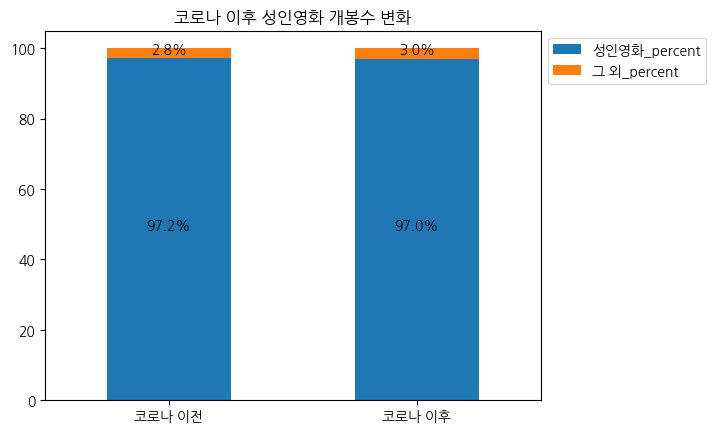

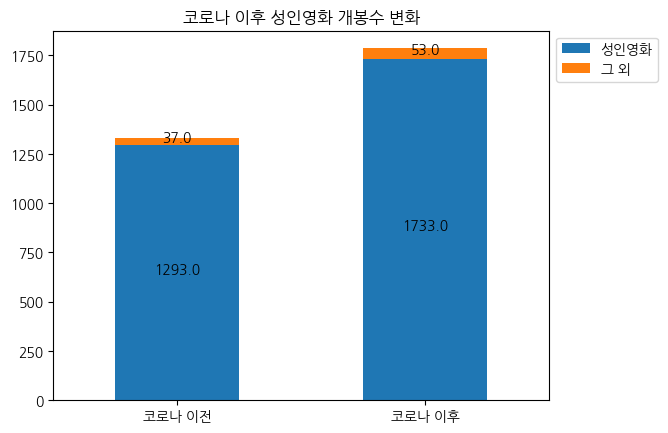

In [248]:
ax = covid_before_after_less40[['성인영화_percent', '그 외_percent']].plot(kind = 'bar', rot = 0, stacked = True, title = '코로나 이후 성인영화 개봉수 변화')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height) + '%', xy=(left+width/2, bottom+height/2), ha='center')
    plt.legend(bbox_to_anchor=(1, 1))
ax = covid_before_after_less40[['성인영화', '그 외']].plot(kind = 'bar', rot = 0, stacked = True, title = '코로나 이후 성인영화 개봉수 변화')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate((height), xy=(left+width/2, bottom+height/2), ha='center')
    plt.legend(bbox_to_anchor=(1, 1))

* 상영횟수가 40회 미만인 영화 중 성인영화의 개봉수가 코로나 이후 440편이나 증가했음을 알 수 있다.
* 그리고 이를 통해 성인영화 대부분의 증가분이 상영횟수가 40회 미만인 형식개봉작임을 알 수 있다.

* ===================================================================
* ==============================다른 주제===============================
* ===================================================================

### 월별 영화 개봉수와 CGV의 주가 비교해보기

##### 공통 데이터(2019 ~ 2022)를 기반으로 연도-월 별 영화 개봉수 시각화

In [128]:
cols = list(pd.read_csv('2019_2022_movies.csv').iloc[3])
df_common = pd.read_csv('2019_2022_movies.csv').iloc[4:]
df_common.columns = cols
df_common =  df_common.set_index('순번')
df_common['개봉일'] = pd.to_datetime(df_common['개봉일'])
# # df_common.dtypes
df_common['개봉년도'] = df_common['개봉일'].dt.year
df_common['개봉월'] = df_common['개봉일'].dt.month
df_common['개봉연월'] = df_common['개봉일'].astype(str).str[:7]
# df_common['연도월'].value_counts().sort_index()
df_common1922 = df_common[df_common['개봉일'] >= '2019-01-01']
df_common1922

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국\n스크린수,전국\n매출액,전국\n관객수,서울\n매출액,서울\n관객수,장르,등급,영화구분,개봉년도,개봉월,개봉연월
순번,,,,,,,,,,,,,,,,,,,,
1,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화,2019,1,2019-01
2,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화,2019,4,2019-04
3,겨울왕국 2,"크리스 벅,제니퍼 리",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-11-21,개봉영화,장편,미국,"2,648","114,810,421,450","13,747,792","28,824,682,580","3,225,974",애니메이션,전체관람가,일반영화,2019,11,2019-11
4,범죄도시2,이상용,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트",NaN,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",2022-05-18,개봉영화,장편,한국,"2,498","131,293,353,478","12,692,959","29,072,759,869","2,755,760",범죄,15세이상관람가,일반영화,2022,5,2022-05
5,알라딘,가이 리치,NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-05-23,개봉영화,장편,미국,"1,311","106,983,620,359","12,555,894","30,218,911,039","3,377,404",어드벤처,전체관람가,일반영화,2019,5,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7538,S누나,이상영,블루커뮤니케이션,NaN,(주)코빈커뮤니케이션즈,2021-09-27,개봉영화,장편,한국,1,"1,000",1,0,0,성인물(에로),청소년관람불가,일반영화,2021,9,2021-09
7539,SNS 러브,NaN,NaN,NaN,스튜디오엘론(주),2021-01-28,개봉영화,장편,미국,1,"1,000",1,0,0,멜로/로맨스,청소년관람불가,일반영화,2021,1,2021-01
7540,SNS 헌팅으로 만난 음란 유학생,아라시야마 미치루,NaN,NaN,(주)빅콘미디어,2021-05-04,개봉영화,장편,일본,1,"6,000",1,0,0,성인물(에로),청소년관람불가,일반영화,2021,5,2021-05


<AxesSubplot:>

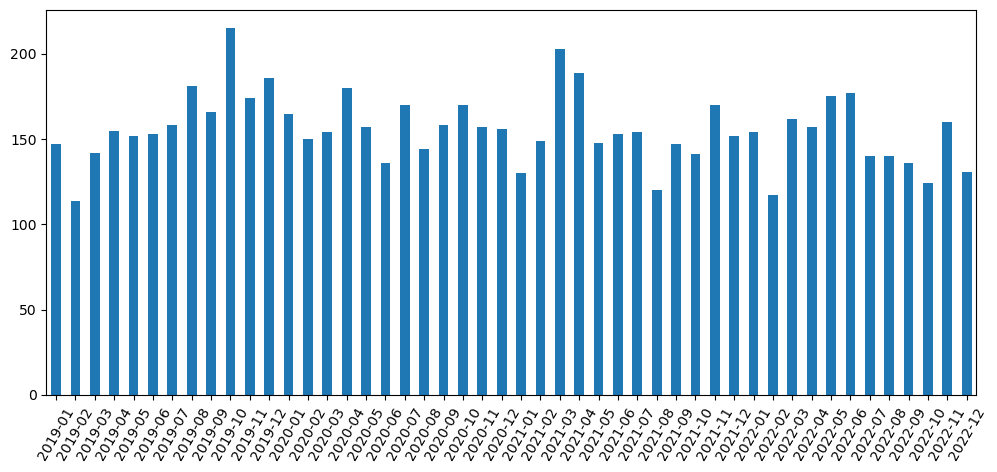

In [127]:
# print(df_common.shape)
coming_out_series = df_common1922['개봉연월'].value_counts().sort_index()
# coming_out_series.plot(kind = 'bar')

# df_common19 = df_common[df_common['개봉년도'] == 2019]
# df_common20 = df_common[df_common['개봉년도'] == 2020]
# df_common21 = df_common[df_common['개봉년도'] == 2021]
# df_common22 = df_common[df_common['개봉년도'] == 2022]

# series_19 = df_common19['개봉연월'].value_counts().sort_index()
# series_20 = df_common20['개봉연월'].value_counts().sort_index()
# series_21 = df_common21['개봉연월'].value_counts().sort_index()
# series_22 = df_common22['개봉연월'].value_counts().sort_index()
coming_out_series.plot.bar(rot = 60, figsize = (12,5))

<AxesSubplot:>

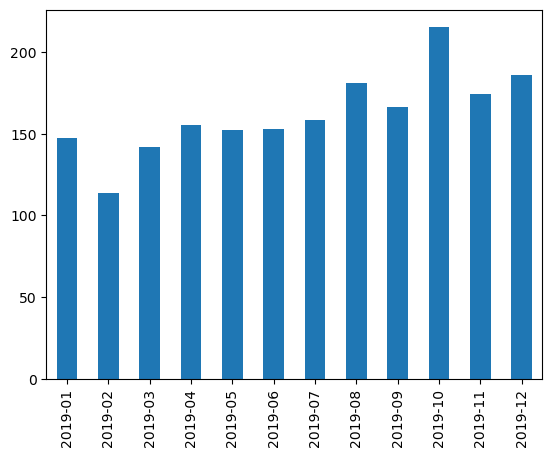

In [41]:
display(series_19.plot.bar());

<AxesSubplot:>

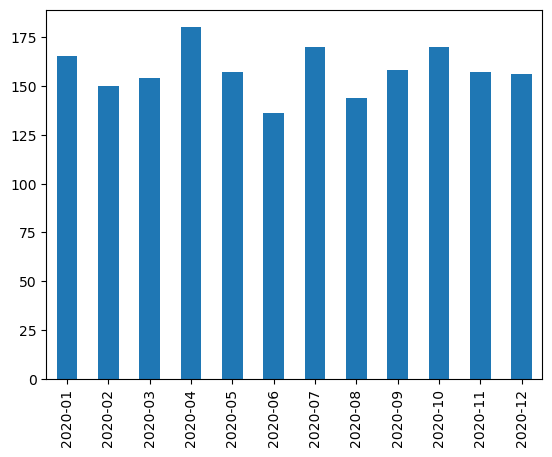

In [42]:
display(series_20.plot.bar());

<AxesSubplot:>

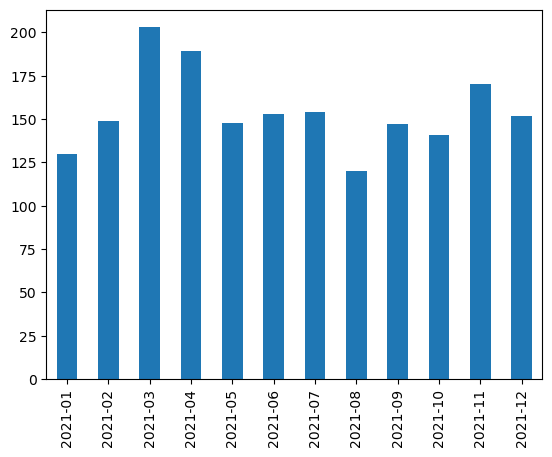

In [43]:
display(series_21.plot.bar());

<AxesSubplot:>

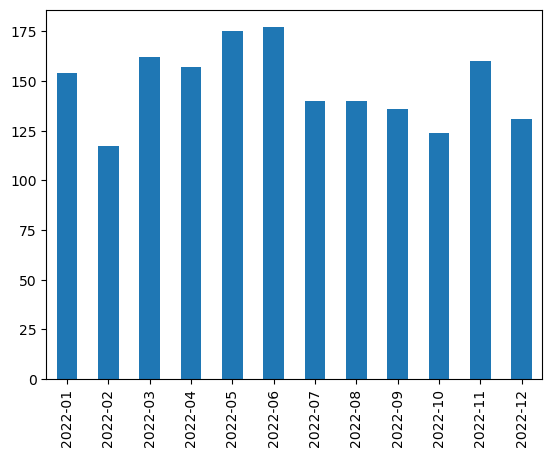

In [44]:
display(series_22.plot.bar());

<AxesSubplot:>

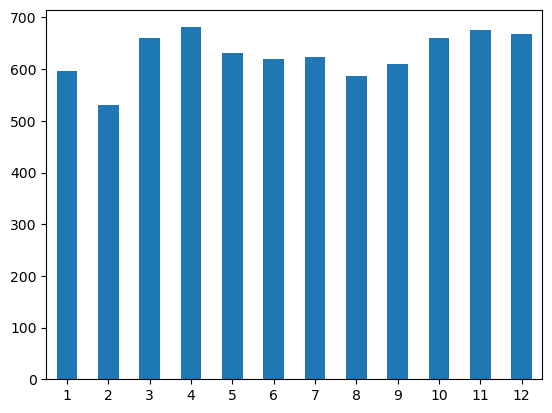

In [31]:
coming_out_month = df_common['개봉월'].value_counts().sort_index()
coming_out_month.plot.bar(rot = 0)

##### 2019 ~ 2022 년도 국내 영화사 년 / 월 별 주가 상승률 가져오기

In [130]:
cgv = fdr.DataReader('079160')
cgv['연월'] = cgv.index.astype(str).str[:7]
cgv = cgv[(cgv['연월'] >= '2019-01') & (cgv['연월'] < '2023-01')]
cgv_m_mean = cgv.groupby('연월').mean()
cgv_rise_rate = cgv_m_mean / cgv_m_mean.iloc[0]
# rise_rate_series.plot.bar();
cgv_rise_rate

,Open,High,Low,Close,Volume,Change
연월,,,,,,
2019-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-02,1.044265,1.048088,1.037571,1.044301,2.086882,1.166518
2019-03,1.117664,1.117323,1.113187,1.115662,1.173560,-0.220454
2019-04,1.082057,1.080302,1.076276,1.077717,1.008764,-0.172261
2019-05,0.931840,0.932002,0.927883,0.924713,0.904468,-4.712222
2019-06,0.889145,0.887317,0.890678,0.890694,0.903293,1.687327
2019-07,0.904461,0.905753,0.899208,0.901789,1.038331,-2.112322
2019-08,0.803883,0.810768,0.799747,0.806793,0.880176,-0.117058
2019-09,0.835996,0.838516,0.835105,0.836948,0.508483,-0.058839


<AxesSubplot:xlabel='연월'>

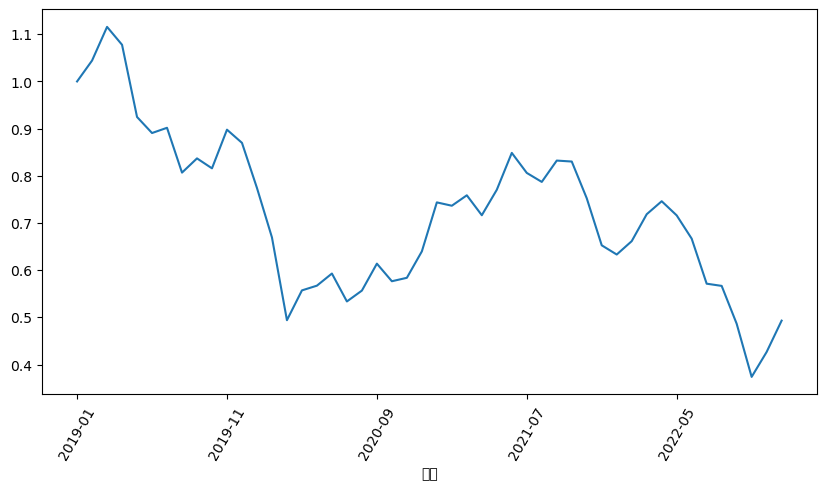

In [132]:
rise_rate_series = cgv_rise_rate['Close']
rise_rate_series.plot(rot = 60, figsize = (10,5))

##### 영화 개봉수와 CGV 주가 상승과의 관계

C:\Users\juku\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\juku\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\juku\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\juku\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\juku\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\juku\anaconda3\lib\

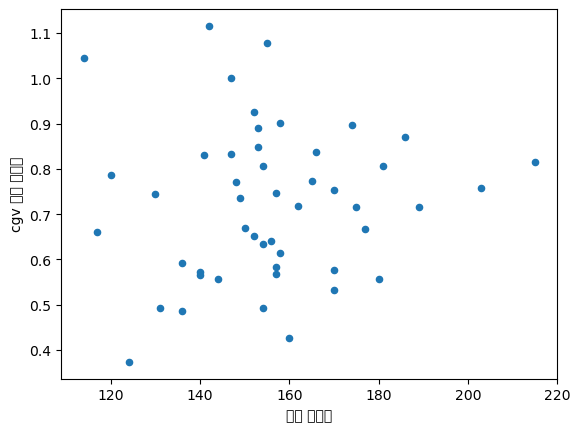

In [133]:
df_movie_cgv = pd.DataFrame()
df_movie_cgv['영화 개봉수'] = coming_out_series
df_movie_cgv['cgv 주가 상승률'] = cgv_rise_rate['Close']
df_movie_cgv.plot.scatter(x = '영화 개봉수', y = 'cgv 주가 상승률');

조금 예상은 했으나 월별 영화 개봉수와 CGV의 주가는 전~혀 관계가 없다는 것을 알 수 있었다^^